In [4]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm

from scipy import misc
from matplotlib import pylab as plt
from sklearn.cluster import KMeans

%matplotlib inline

### Load Data

In [5]:
def readFile(fname):
    # ref: https://stackoverflow.com/questions/3277503/how-do-i-read-a-file-line-by-line-into-a-list
    with open(fname, 'r', errors='ignore') as f:
        content = f.readlines()
    content = [x.strip() for x in content] # remove whitespace characters
    return content

In [6]:
science2kdocword = np.load("./data/science2k-doc-word.npy")
science2kworddoc = np.load("./data/science2k-word-doc.npy")
vocabs = readFile('./data/science2k-vocab.txt')
titles = readFile('./data/science2k-titles.txt')

### Test on K values

In [22]:
def calculateDistribution(k, labels):
    dist = [0]*k
    for label in labels:
        dist[label] += 1
    return dist

In [23]:
def testDifferentKValue(k_value_range, data):
    cluster_distributions = []
    inertia_array = []
    for k in k_value_range:
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        cluster_distributions.append(calculateDistribution(k, kmeans.labels_))
        inertia_array.append(kmeans.inertia_)
    return cluster_distributions, inertia_array

In [32]:
def plotDistributions(k_value_range, cluster_distributions):
    plt.figure(figsize=(50, 50))
    plt.subplots_adjust(hspace=.7)

    for k in k_value_range:
        plt.subplot(5, 4, k + 1)
        plt.bar(range(1, k + 1), cluster_distributions[k - 1])
        plt.title('K = ' + str(k))

### Select Top 10 Documents

In [10]:
def showTopTen(k, data, words, wordsType):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    distance_matrix = kmeans.transform(data)    
    target_indexs_set = getTopTenIndexs(k, distance_matrix, kmeans.labels_)
    
    for classLabel in range(k):
        closetIndexs = target_indexs_set[classLabel]
        print('- - - - - - - - - - - - - - - -')
        print('Cluster: ' + str(classLabel + 1))
            
        print('[Top 10 closet ' + wordsType + ']')
        for index in closetIndexs:
            print(words[index])

In [11]:
def getTopTenIndexs(k, distance_matrix, labels):
    maxSize = 10
    target_indexs_set = []
    
    for classLabel in range(k):
        original_index_mapping = []
        distance_value = []
        for row in range(len(distance_matrix)):
            if labels[row] == classLabel:
                original_index_mapping.append(row)
                distance_value.append(distance_matrix[row][classLabel])
        target_indexs = []    
        sorted_distance_indexs = np.argsort(distance_value)
        
        for sorted_index in sorted_distance_indexs:
            target_indexs.append(original_index_mapping[sorted_index])
            if len(target_indexs) == maxSize:
                break
        target_indexs_set.append(target_indexs)
        
    return target_indexs_set

## Start Working

---
### Clustering Documents

In [26]:
k_value_range = range(1, 20)

In [27]:
cluster_distributions, inertia_array = testDifferentKValue(k_value_range, science2kdocword)

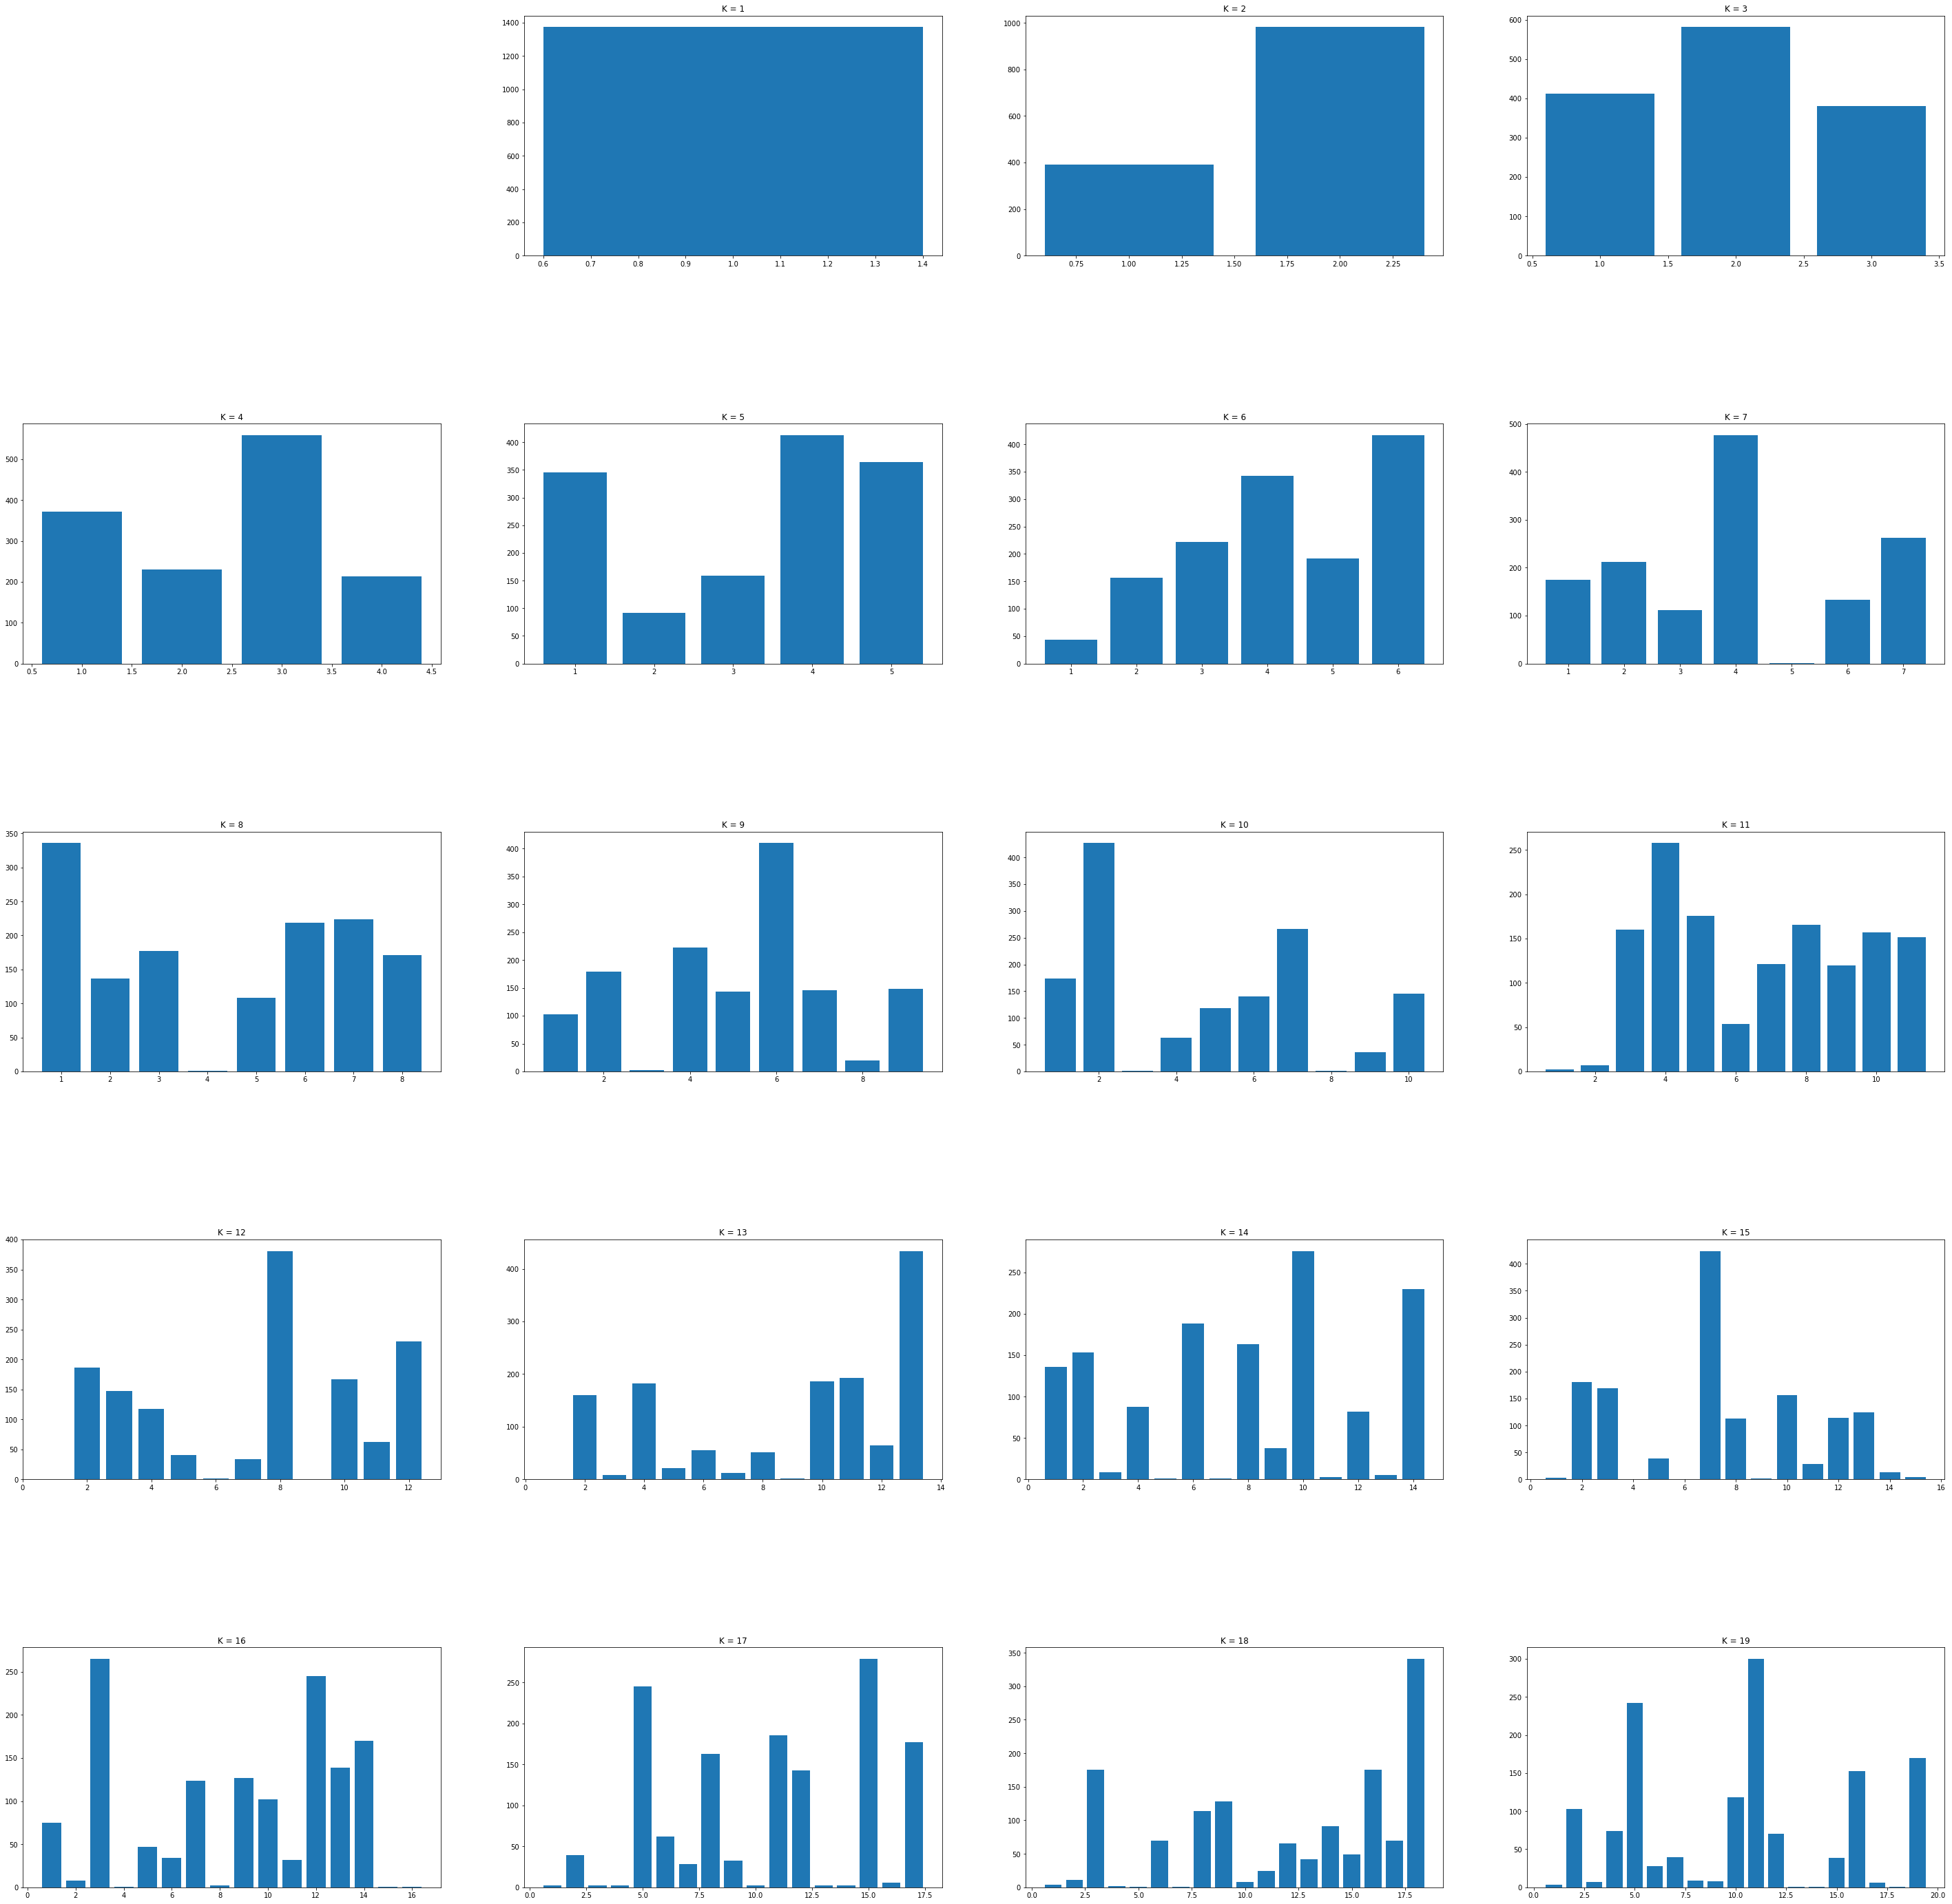

In [33]:
plotDistributions(k_value_range, cluster_distributions)

In [35]:
showTopTen(5, science2kdocword, titles, 'titles')

- - - - - - - - - - - - - - - -
Cluster: 1
[Top 10 closet titles]
"Distinct Classes of Yeast Promoters Revealed by Differential TAF Recruitment"
"Efficient Initiation of HCV RNA Replication in Cell Culture"
"T Cell-Independent Rescue of B Lymphocytes from Peripheral Immune Tolerance"
"Reduced Food Intake and Body Weight in Mice Treated with Fatty Acid Synthase Inhibitors"
"Patterning of the Zebrafish Retina by a Wave of Sonic Hedgehog Activity"
"Coupling of Stress in the ER to Activation of JNK Protein Kinases by Transmembrane Protein Kinase IRE1"
"Disruption of Signaling by Yersinia Effector YopJ, a Ubiquitin-like Protein Protease"
"An Anti-Apoptotic Role for the p53 Family Member, p73, during Developmental Neuron Death"
"Identification of Synergistic Signals Initiating Inner Ear Development"
"Molecular Linkage Underlying Microtubule Orientation toward Cortical Sites in Yeast"
- - - - - - - - - - - - - - - -
Cluster: 2
[Top 10 closet titles]
"Africa Boosts AIDS Vaccine R&D"
"A Renewed

---
### Clustering Terms

In [37]:
cluster_distributions, inertia_array = testDifferentKValue(k_value_range, science2kworddoc)

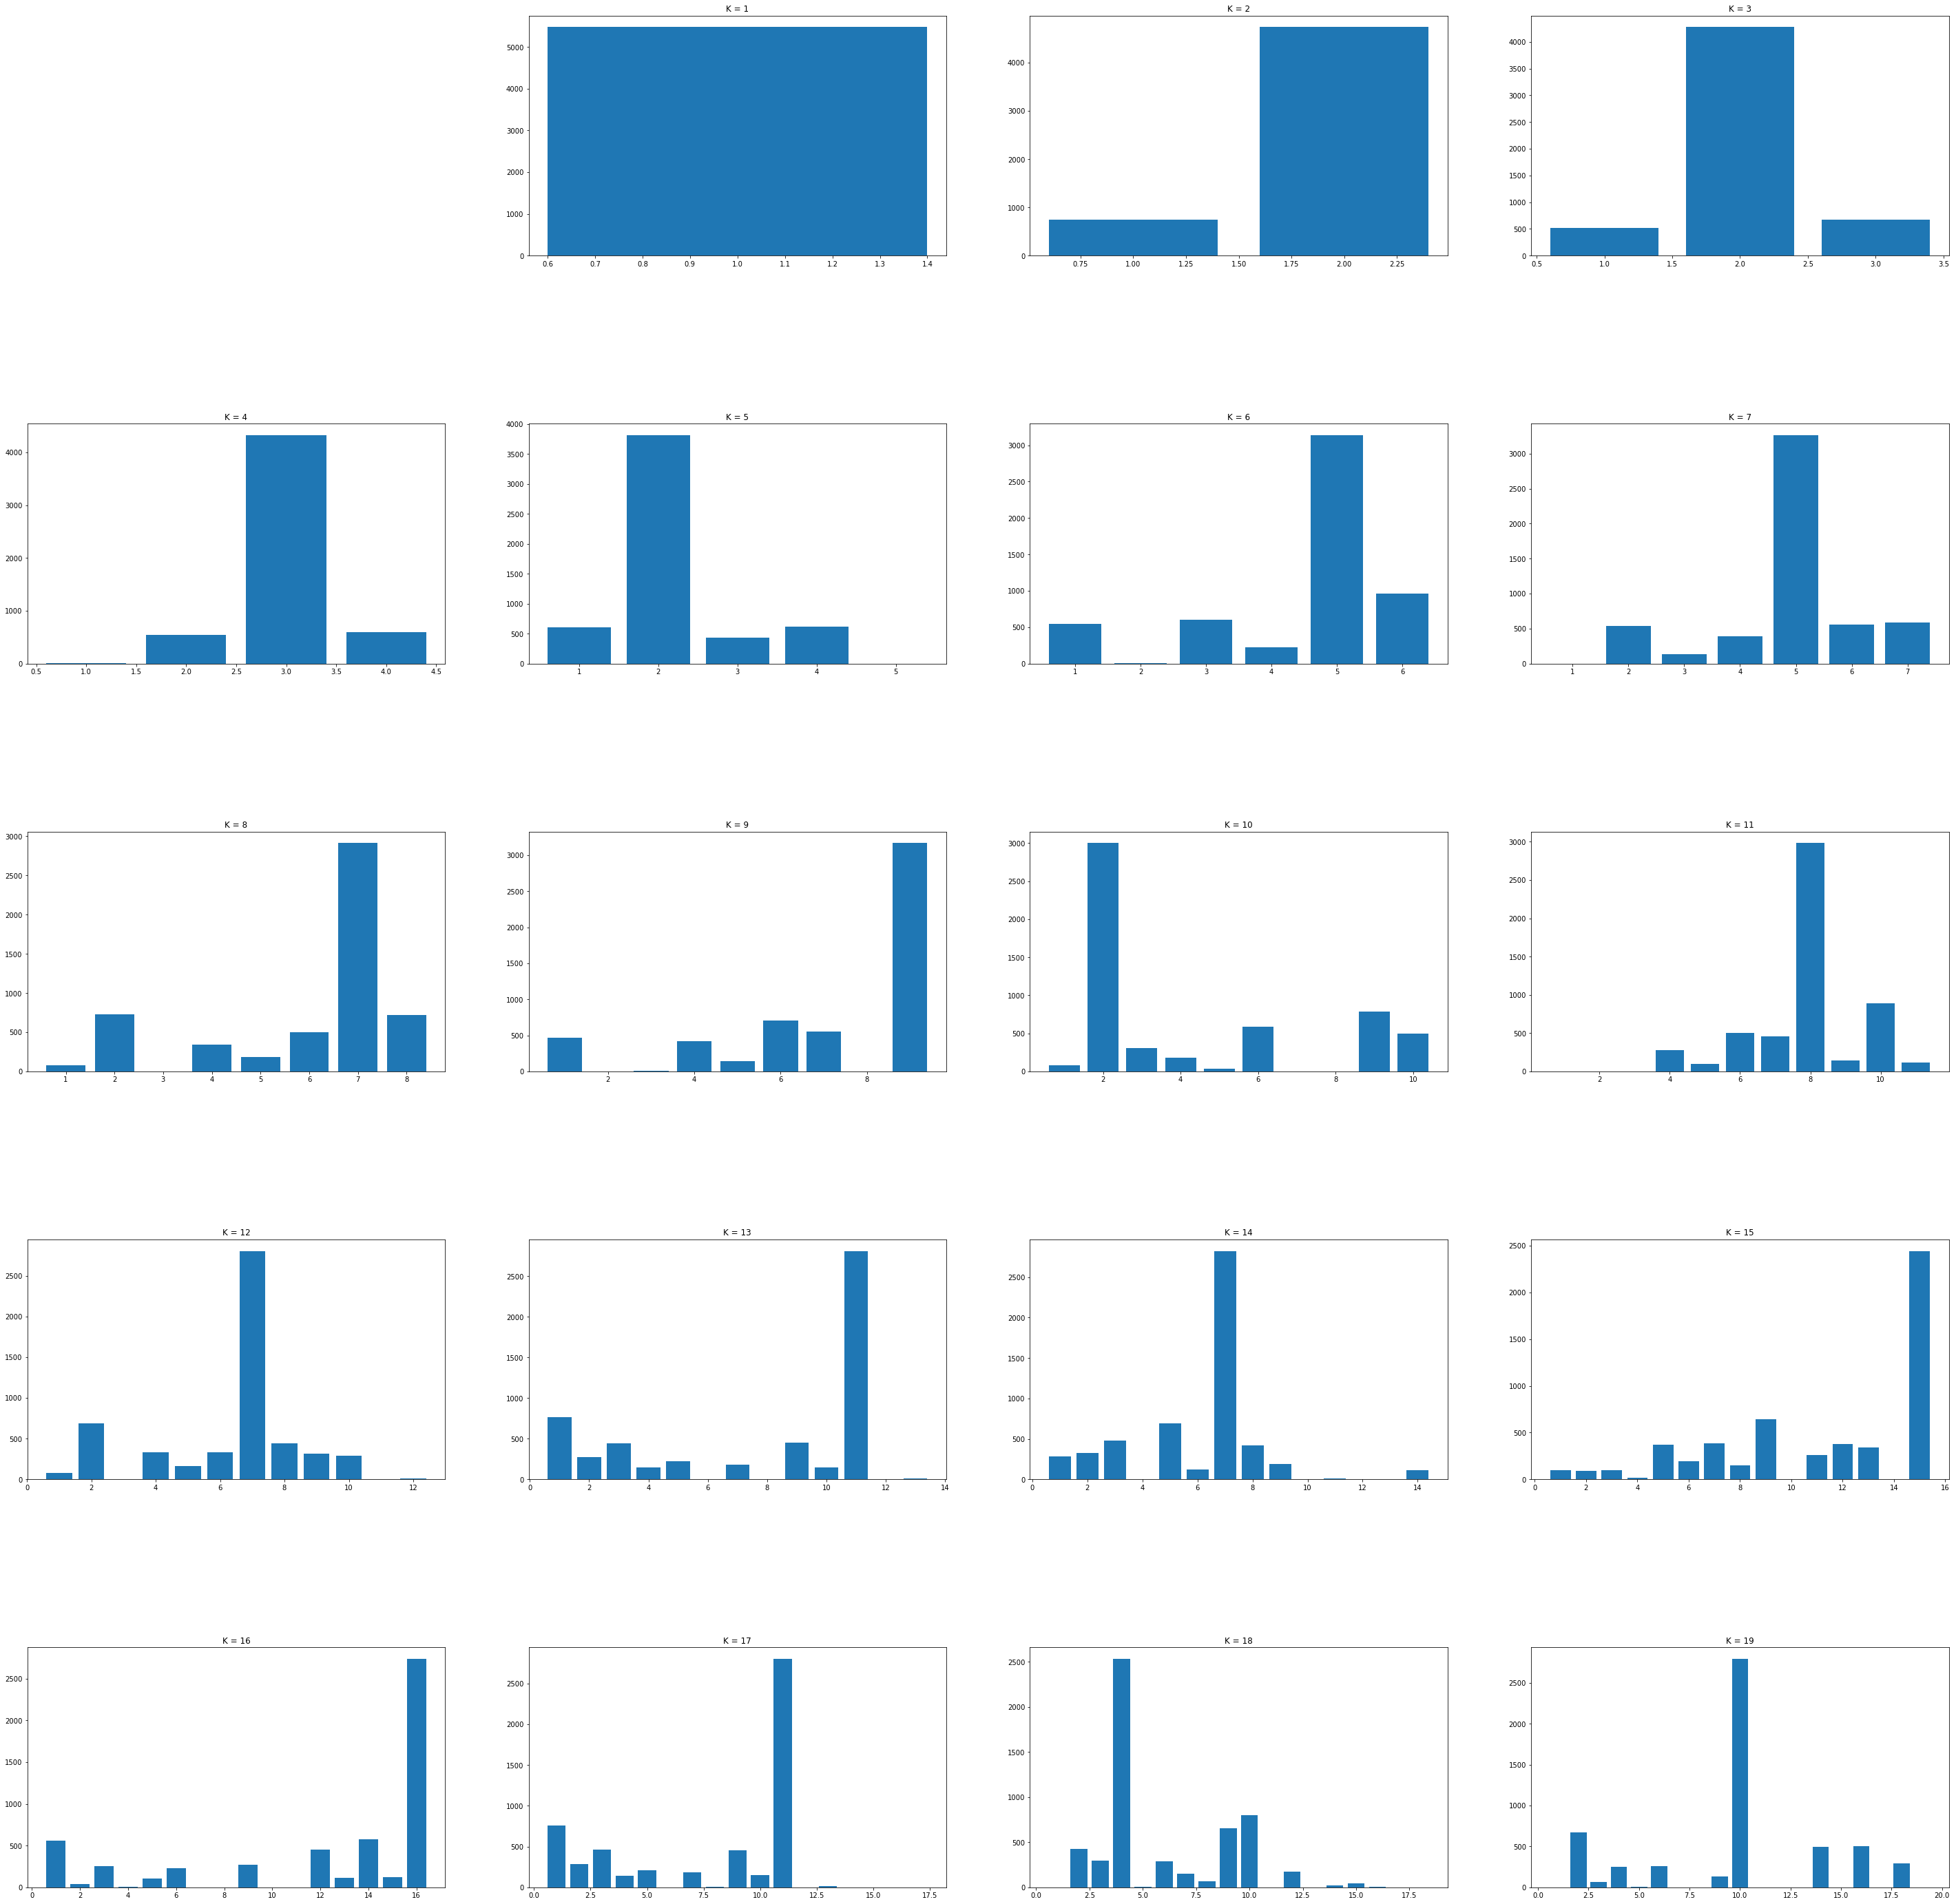

In [38]:
plotDistributions(k_value_range, cluster_distributions)

In [41]:
showTopTen(6, science2kworddoc, vocabs, 'vocabs')

- - - - - - - - - - - - - - - -
Cluster: 1
[Top 10 closet vocabs]
approximation
angular
finite
coherent
nonlinear
approximate
regime
periodic
calculation
energies
- - - - - - - - - - - - - - - -
Cluster: 2
[Top 10 closet vocabs]
protein
expression
gene
proteins
genes
cell
expressed
cells
dna
- - - - - - - - - - - - - - - -
Cluster: 3
[Top 10 closet vocabs]
recalls
clinton
geneticist
security
prize
fight
finished
spending
campaign
rights
- - - - - - - - - - - - - - - -
Cluster: 4
[Top 10 closet vocabs]
biochem
terminus
cooh
nh2
inhibitor
cdna
affinity
incubated
blot
specificity
- - - - - - - - - - - - - - - -
Cluster: 5
[Top 10 closet vocabs]
lcts
aptamers
trxr
neas
dnag
proteorhodopsin
nompc
doxy
lg268
kcv
- - - - - - - - - - - - - - - -
Cluster: 6
[Top 10 closet vocabs]
org
sciencemag
vol
thymocytes
endothelial
myeloid
caspase
agonists
immunoreactive
cd3
